In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639792 sha256=afd991d14e4003e5c70c5cb72669de63839b2e721b76575bfb052ee161d279fa
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
# Python
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
% matplotlib inline
from prophet import Prophet

In [ ]:
# Python
df = pd.read_csv('invoices_im.csv')
df.head()

,_id,LC_currency.Symbol,LC_currency.Code,LC_currency._id,FC_currency.Symbol,FC_currency.Code,FC_currency._id,trackingStatus.received.comment,trackingStatus.received.date,trackingStatus.received.status,trackingStatus.initialReview.comment,trackingStatus.initialReview.status,trackingStatus.initialReview.date,trackingStatus.underReview.comment,trackingStatus.underReview.date,trackingStatus.underReview.status,trackingStatus.underApprove.comment,trackingStatus.underApprove.date,trackingStatus.underApprove.status,trackingStatus.paymentInProcess.comment,trackingStatus.paymentInProcess.date,trackingStatus.paymentInProcess.status,trackingStatus.paymentInProcess.updatedBy,trackingStatus.paid.comment,trackingStatus.paid.date,trackingStatus.paid.status,trackingStatus.current_status,isAR,initWorkFlow,workFlowStatus,discountPercent,discountAmt,discountAmt_bc,taxAmt,taxAmt_bc,isPo,isReceipt,isPettyCash,isPrePayment,isExpense,...,accessGroup,accessUser,invoiceTag,items,accessDept,accessComp,accessOrg,attachments,tenantId,vendorId,vendorName,vendorSite,invoiceId,invoiceDate,invoiceHash,dueDate,grossAmt,grossAmt_bc,netAmt,netAmt_bc,po,paymentTerms,organizationId,organizationName,createdBy,createdDate,createdByVendor,expenseType,conversionRate,requesterId,description,invoicePath,version,__v,reviewStatus,reviewed,workflowId,approveStatus,approved,scheduledAmount
0,61278a6db52ecd84cfde68c7,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:34:53.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:34:54.000Z,reviewed,2021-08-26T12:38:14.000Z,completed,approved,2021-08-26T12:38:57.000Z,completed,Invoice move to finance and payment in process,2021-08-26T12:48:53.000Z,readyToPay,salic-requester@mailinator.com,Invoice is partially paid,2021-08-31T12:39:31.000Z,partial,paymentInProcess,False,True,completed,0,0,0,0.0,0.0,True,False,False,True,False,...,[],[],"[{""tag"":[""SALIC VENDOR"",10,""2021-08-26"",""INV-3...","[{""discount"":""0"",""discount_bc"":""0"",""amount"":""1...",[],[],[],[],927e3c5a-8ac5-4716-957c-25ee9bb39d54,603f8435f2b9dac1b8d7888d,SALIC VENDOR,"Jeddah, Saudi Arabia",INV-3466,2021-02-26,017e01634f80b518953858ab578f7e403527c2bb3ce6ee...,2021-11-04,10.0,10.0,10.0,10.0,104,15,602241c47a18fc82a41cd973,SALIC,salic-requester@mailinator.com,2021-02-26T12:34:53.000Z,False,false,true,salic-requester@mailinator.com,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:14.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:38:57.000Z,7.0
1,61278a89b52ecd1e55de68d0,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:35:21.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:35:22.000Z,reviewed,2021-08-26T12:38:20.000Z,completed,approved,2021-08-26T12:39:06.000Z,completed,Invoice move to finance and payment in process,2021-08-26T12:40:19.000Z,readyToPay,salic-requester@mailinator.com,false,2021-08-26T12:40:19.000Z,inProgress,paymentInProcess,False,True,completed,0,0,0,0.0,0.0,True,False,True,True,True,...,[],[],"[{""tag"":[""SALIC VENDOR"",250,""2021-08-26"",""INV-...","[{""discount"":""0"",""discount_bc"":""0"",""amount"":""2...",[],[],[],[],927e3c5a-8ac5-4716-957c-25ee9bb39d54,603f8435f2b9dac1b8d7888d,SALIC VENDOR,"Jeddah, Saudi Arabia",INV-3467,2021-03-26,7cd40d59ed29f88a0e27a8888738ad09a7e27dd397c7d4...,2021-09-12,250.0,250.0,250.0,250.0,106,15,602241c47a18fc82a41cd973,SALIC,salic-requester@mailinator.com,2021-03-26T12:35:21.000Z,False,NaN,true,salic-requester@mailinator.com,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:19.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:06.000Z,NaN
2,61278ab0b52ecdb885de68ef,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:36:00.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:36:01.000Z,reviewed,2021-08-26T12:38:25.000Z,completed,ok,2021-08-26T12:3

In [ ]:
df.columns

Index(['_id', 'LC_currency.Symbol', 'LC_currency.Code', 'LC_currency._id',
       'FC_currency.Symbol', 'FC_currency.Code', 'FC_currency._id',
       'trackingStatus.received.comment', 'trackingStatus.received.date',
       'trackingStatus.received.status',
       'trackingStatus.initialReview.comment',
       'trackingStatus.initialReview.status',
       'trackingStatus.initialReview.date',
       'trackingStatus.underReview.comment', 'trackingStatus.underReview.date',
       'trackingStatus.underReview.status',
       'trackingStatus.underApprove.comment',
       'trackingStatus.underApprove.date',
       'trackingStatus.underApprove.status',
       'trackingStatus.paymentInProcess.comment',
       'trackingStatus.paymentInProcess.date',
       'trackingStatus.paymentInProcess.status',
       'trackingStatus.paymentInProcess.updatedBy',
       'trackingStatus.paid.comment', 'trackingStatus.paid.date',
       'trackingStatus.paid.status', 'trackingStatus.current_status', 'isAR',
     

In [ ]:
df = df.filter(['items','createdDate'])

In [ ]:
items = []
cost = []
quantities = []
for i in df["items"]:
  # Converting string to list
  res = i.strip('][').split(', ')
  for dic in res:
    dic_res = ast.literal_eval(dic)
    try:
      print(dic_res["itemName"])
      item_name = dic_res["itemName"]
      item_cost = dic_res["unitCost_bc"]
      item_quantity = dic_res["quantity"]
      cost.append(item_cost)
      quantities.append(float(item_quantity))
      items.append(item_name)
    except Exception as e:
      item_quantity = None
      item_name = None
      item_cost = None
      quantities.append(item_quantity)
      items.append(item_name) 
      cost.append(item_cost)

bags
bags
bags
bags
pens
bags
bags
Mobile
Crates
Crates
Caps
PC
Stationary
Plastic Bags
Plastic Bags
bags
Barrels
Bag
juice
Computers
Plastic Bags
Plastic Bags
Plastic Bags
Plastic Bags
Bag
E17 Laptop
BAgs
Laptop
Plastic Bags
Laptops
Asset
Asset
Asset
Asset
Mobile
slack
Laptop Dell
Laptop Computers Dell
Paper Ream A4
Paper Ream A4
Paper Ream A4
Paper Ream A4
Repair of Laptop
Item


In [ ]:
print(len(quantities),len(items),len(df["items"]),len(df['createdDate']),len(cost))

45 45 45 45 45


In [ ]:
df["unit_price"] = cost
df["item_name"] = items

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   items        45 non-null     object
 1   createdDate  45 non-null     object
 2   unit_price   44 non-null     object
 3   item_name    44 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [ ]:
df.drop('items', axis=1, inplace=True)
df

,createdDate,unit_price,item_name
0,2021-02-26T12:34:53.000Z,10.0000,bags
1,2021-03-26T12:35:21.000Z,50.0000,bags
2,2021-08-26T12:36:00.000Z,80.0000,bags
3,2021-08-26T12:36:32.000Z,100.0000,bags
4,2021-05-26T12:36:56.000Z,10.0000,pens
5,2021-08-31T09:38:39.000Z,200.0000,bags
6,2021-08-31T11:42:55.000Z,100.0000,bags
7,2021-09-01T08:19:42.000Z,33.0000,Mobile
8,2021-09-10T11:03:53.000Z,85.0000,Crates
9,2021-09-10T11:04:31.000Z,85.0000,Crates


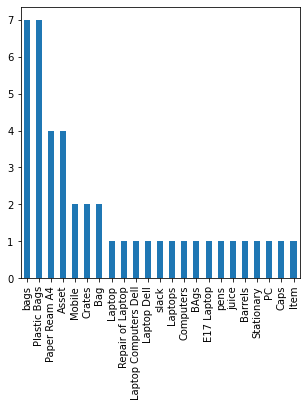

In [ ]:
df["item_name"].value_counts().plot.bar(figsize=(5, 5));

In [ ]:
data = df[df["item_name"] == "bags"]
data

,createdDate,unit_price,item_name
0,2021-02-26T12:34:53.000Z,10.0000,bags
1,2021-03-26T12:35:21.000Z,50.0000,bags
2,2021-08-26T12:36:00.000Z,80.0000,bags
3,2021-08-26T12:36:32.000Z,100.0000,bags
5,2021-08-31T09:38:39.000Z,200.0000,bags
6,2021-08-31T11:42:55.000Z,100.0000,bags
15,2021-09-21T13:01:38.000Z,10.0000,bags


In [ ]:
data = data.iloc[: , :-1]
data

,createdDate,unit_price
0,2021-02-26T12:34:53.000Z,10.0000
1,2021-03-26T12:35:21.000Z,50.0000
2,2021-08-26T12:36:00.000Z,80.0000
3,2021-08-26T12:36:32.000Z,100.0000
5,2021-08-31T09:38:39.000Z,200.0000
6,2021-08-31T11:42:55.000Z,100.0000
15,2021-09-21T13:01:38.000Z,10.0000


In [ ]:
data.rename(columns={'createdDate': 'ds', 'unit_price': 'y'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,ds,y
0,2021-02-26T12:34:53.000Z,10.0000
1,2021-03-26T12:35:21.000Z,50.0000
2,2021-08-26T12:36:00.000Z,80.0000
3,2021-08-26T12:36:32.000Z,100.0000
5,2021-08-31T09:38:39.000Z,200.0000
6,2021-08-31T11:42:55.000Z,100.0000
15,2021-09-21T13:01:38.000Z,10.0000


In [ ]:
date = []
for i in data["ds"]:
  i = i[:10]
  date.append(i)
df["ds"] = date
df['ds']= pd.to_datetime(df['ds'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2021-02-26,10.0000
1,2021-03-26,50.0000
2,2021-08-26,80.0000
3,2021-08-26,100.0000
5,2021-08-31,200.0000
6,2021-08-31,100.0000
15,2021-09-21,10.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7 non-null      datetime64[ns]
 1   y       7 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 168.0+ bytes


In [ ]:
m = Prophet()
m.fit(data)

In [ ]:
# time period for prediction
future = m.make_future_dataframe(periods=90)
future.tail()

In [ ]:
# applying model
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)